In [1]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df.drop(['Id'],axis = 1)

In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [8]:
df.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [9]:
df.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [10]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [11]:
df.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [12]:
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [13]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [14]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [15]:
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [16]:
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [17]:
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [18]:
df.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [19]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [20]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [21]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [22]:
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [23]:
df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [24]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [25]:
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [26]:
df.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [27]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [28]:
df.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [29]:
df.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [30]:
df.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [31]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [32]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [33]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [34]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [35]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [36]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [37]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [38]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [39]:
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [40]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [41]:
df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [42]:
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [43]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [44]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [45]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [46]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [47]:
df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [48]:
df.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

MSZoning
Street
Alley
LandContour
LandSlope
Condition1
Condition2
BldgType
RoofStyle
RoofMatl
ExterCond
BsmtCond
Heating
CentralAir
Electrical
Functional
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
RoofMatl
ExterCond
BsmtCond

In [49]:
df2 = df.drop(['MSZoning','LotFrontage','Street','Alley','LandContour','LandSlope','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','ExterCond','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','RoofMatl','ExterCond','BsmtCond','PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],axis = 1)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   LotShape       1460 non-null   object 
 3   Utilities      1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  Exterior1st    1460 non-null   object 
 12  Exterior2nd    1460 non-null   object 
 13  MasVnrType     1452 non-null   object 
 14  MasVnrArea     1452 non-null   float64
 15  ExterQual      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtExpo

In [51]:
dummies = pd.get_dummies(df2.LotShape,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['LotShape'],axis = 1)
df2.head()

   IR1  IR2  IR3  Reg
0    0    0    0    1
1    0    0    0    1
2    1    0    0    0
3    1    0    0    0
4    1    0    0    0


,MSSubClass,LotArea,Utilities,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,IR1,IR2,IR3,Reg
0,60,8450,AllPub,Inside,CollgCr,2Story,7,5,2003,2003,...,0,0,0,2,2008,208500,0,0,0,1
1,20,9600,AllPub,FR2,Veenker,1Story,6,8,1976,1976,...,0,0,0,5,2007,181500,0,0,0,1
2,60,11250,AllPub,Inside,CollgCr,2Story,7,5,2001,2002,...,0,0,0,9,2008,223500,1,0,0,0
3,70,9550,AllPub,Corner,Crawfor,2Story,7,5,1915,1970,...,0,0,0,2,2006,140000,1,0,0,0
4,60,14260,AllPub,FR2,NoRidge,2Story,8,5,2000,2000,...,0,0,0,12,2008,250000,1,0,0,0


In [52]:
dummies = pd.get_dummies(df2.BsmtExposure,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['BsmtExposure'],axis = 1)
df2.shape

   Av  Gd  Mn  No
0   0   0   0   1
1   0   1   0   0
2   0   0   1   0
3   0   0   0   1
4   1   0   0   0


(1460, 60)

In [53]:
dummies = pd.get_dummies(df2.BsmtFinType1,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['BsmtFinType1'],axis = 1)
df2.shape

   ALQ  BLQ  GLQ  LwQ  Rec  Unf
0    0    0    1    0    0    0
1    1    0    0    0    0    0
2    0    0    1    0    0    0
3    1    0    0    0    0    0
4    0    0    1    0    0    0


(1460, 65)

In [54]:
dummies = pd.get_dummies(df2.BsmtFinType2,drop_first=False)
dummies.rename(columns = {'ALQ':'ALQ2', 'BLQ':'BLQ2', 'GLQ':'GLQ2', 'LwQ':'LwQ2', 'Rec':'Rec2', 'Unf':'Unf2'}, inplace = True)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['BsmtFinType2'],axis = 1)
df2.shape

   ALQ2  BLQ2  GLQ2  LwQ2  Rec2  Unf2
0     0     0     0     0     0     1
1     0     0     0     0     0     1
2     0     0     0     0     0     1
3     0     0     0     0     0     1
4     0     0     0     0     0     1


(1460, 70)

In [55]:
dummies = pd.get_dummies(df2.HeatingQC,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['HeatingQC'],axis = 1)
df2.shape

   Ex  Fa  Gd  Po  TA
0   1   0   0   0   0
1   1   0   0   0   0
2   1   0   0   0   0
3   0   0   1   0   0
4   1   0   0   0   0


(1460, 74)

In [56]:
dummies = pd.get_dummies(df2.KitchenQual,drop_first=False)
dummies.rename(columns = {'Ex':'Ex2', 'Fa':'Fa2', 'Gd':'Gd2', 'TA':'TA2'}, inplace = True)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['KitchenQual'],axis = 1)
df2.shape

   Ex2  Fa2  Gd2  TA2
0    0    0    1    0
1    0    0    0    1
2    0    0    1    0
3    0    0    1    0
4    0    0    1    0


(1460, 77)

In [57]:
dummies = pd.get_dummies(df2.GarageType,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['GarageType'],axis = 1)
df2.shape

   2Types  Attchd  Basment  BuiltIn  CarPort  Detchd
0       0       1        0        0        0       0
1       0       1        0        0        0       0
2       0       1        0        0        0       0
3       0       0        0        0        0       1
4       0       1        0        0        0       0


(1460, 82)

In [58]:
dummies = pd.get_dummies(df2.GarageFinish,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['GarageFinish'],axis = 1)
df2.shape

   Fin  RFn  Unf
0    0    1    0
1    0    1    0
2    0    1    0
3    0    0    1
4    0    1    0


(1460, 84)

In [59]:
dummies = pd.get_dummies(df2.Utilities,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['Utilities'],axis = 1)
df2.shape

   AllPub  NoSeWa
0       1       0
1       1       0
2       1       0
3       1       0
4       1       0


(1460, 85)

In [60]:
dummies = pd.get_dummies(df2.LotConfig,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['LotConfig'],axis = 1)
df2.shape

   Corner  CulDSac  FR2  FR3  Inside
0       0        0    0    0       1
1       0        0    1    0       0
2       0        0    0    0       1
3       1        0    0    0       0
4       0        0    1    0       0


(1460, 89)

In [61]:
dummies = pd.get_dummies(df2.Neighborhood,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['Neighborhood'],axis = 1)
df2.shape

   Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  \
0        0        0       0        0        0        1        0        0   
1        0        0       0        0        0        0        0        0   
2        0        0       0        0        0        1        0        0   
3        0        0       0        0        0        0        1        0   
4        0        0       0        0        0        0        0        0   

   Gilbert  IDOTRR  ...  NoRidge  NridgHt  OldTown  SWISU  Sawyer  SawyerW  \
0        0       0  ...        0        0        0      0       0        0   
1        0       0  ...        0        0        0      0       0        0   
2        0       0  ...        0        0        0      0       0        0   
3        0       0  ...        0        0        0      0       0        0   
4        0       0  ...        1        0        0      0       0        0   

   Somerst  StoneBr  Timber  Veenker  
0        0        0       0        

(1460, 113)

In [62]:
dummies = pd.get_dummies(df2.HouseStyle,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['HouseStyle'],axis = 1)
df2.shape

   1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       0       0       0       0       1       0     0
1       0       0       1       0       0       0       0     0
2       0       0       0       0       0       1       0     0
3       0       0       0       0       0       1       0     0
4       0       0       0       0       0       1       0     0


(1460, 120)

In [63]:
dummies = pd.get_dummies(df2.Exterior1st,drop_first=False)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['Exterior1st'],axis = 1)
df2.shape

   AsbShng  AsphShn  BrkComm  BrkFace  CBlock  CemntBd  HdBoard  ImStucc  \
0        0        0        0        0       0        0        0        0   
1        0        0        0        0       0        0        0        0   
2        0        0        0        0       0        0        0        0   
3        0        0        0        0       0        0        0        0   
4        0        0        0        0       0        0        0        0   

   MetalSd  Plywood  Stone  Stucco  VinylSd  Wd Sdng  WdShing  
0        0        0      0       0        1        0        0  
1        1        0      0       0        0        0        0  
2        0        0      0       0        1        0        0  
3        0        0      0       0        0        1        0  
4        0        0      0       0        1        0        0  


(1460, 134)

In [64]:
dummies = pd.get_dummies(df2.Exterior2nd,drop_first=False)
dummies.rename(columns = {'AsbShng':'AsbShng', 'AsphShn': 'AsphShn2', 'Brk Cmn': 'Brk Cmn2', 'BrkFace': 'BrkFace2', 'CBlock': 'CBlock2', 'CmentBd': 'CmentBd2', 'HdBoard': 'HdBoard2', 'ImStucc': 'ImStucc2', 'MetalSd': 'MetalSd2', 'Other': 'Other2', 'Plywood': 'Plywood2' ,'Stone': 'Stone2', 'Stucco': 'Stucco2', 'VinylSd': 'VinylSd2', 'Wd Sdng': 'Wd Sdng2', 'Wd Shng': 'Wd Shng2'}, inplace = True)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['Exterior2nd'],axis = 1)
df2.shape

   AsbShng  AsphShn2  Brk Cmn2  BrkFace2  CBlock2  CmentBd2  HdBoard2  \
0        0         0         0         0        0         0         0   
1        0         0         0         0        0         0         0   
2        0         0         0         0        0         0         0   
3        0         0         0         0        0         0         0   
4        0         0         0         0        0         0         0   

   ImStucc2  MetalSd2  Other2  Plywood2  Stone2  Stucco2  VinylSd2  Wd Sdng2  \
0         0         0       0         0       0        0         1         0   
1         0         1       0         0       0        0         0         0   
2         0         0       0         0       0        0         1         0   
3         0         0       0         0       0        0         0         0   
4         0         0       0         0       0        0         1         0   

   Wd Shng2  
0         0  
1         0  
2         0  
3         1  
4         

(1460, 149)

In [65]:
dummies = pd.get_dummies(df2.MasVnrType,drop_first=False)
dummies.rename(columns = {'BrkFace': 'BrkFace3','Stone': 'Stone3'}, inplace = True)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['MasVnrType'],axis = 1)
df2.shape

   BrkCmn  BrkFace3  None  Stone3
0       0         1     0       0
1       0         0     1       0
2       0         1     0       0
3       0         0     1       0
4       0         1     0       0


(1460, 152)

In [66]:
dummies = pd.get_dummies(df2.ExterQual,drop_first=False)
dummies.rename(columns = {'Ex':'Ex3', 'Fa':'Fa3', 'Gd':'Gd3', 'TA':'TA3'}, inplace = True)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['ExterQual'],axis = 1)
df2.shape

   Ex3  Fa3  Gd3  TA3
0    0    0    1    0
1    0    0    0    1
2    0    0    1    0
3    0    0    0    1
4    0    0    1    0


(1460, 155)

In [67]:
dummies = pd.get_dummies(df2.Foundation,drop_first=False)
dummies.rename(columns = {'CBlock': 'CBlock4','Stone': 'Stone4'}, inplace = True)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['Foundation'],axis = 1)
df2.shape

   BrkTil  CBlock4  PConc  Slab  Stone4  Wood
0       0        0      1     0       0     0
1       0        1      0     0       0     0
2       0        0      1     0       0     0
3       1        0      0     0       0     0
4       0        0      1     0       0     0


(1460, 160)

In [68]:
dummies = pd.get_dummies(df2.BsmtQual,drop_first=False)
dummies.rename(columns = {'Ex':'Ex4', 'Fa':'Fa4', 'Gd':'Gd4', 'TA':'TA4'}, inplace = True)
print(dummies.head())
df2 = pd.concat([df2, dummies], axis='columns')
df2 = df2.drop(['BsmtQual'],axis = 1)
df2.shape

   Ex4  Fa4  Gd4  TA4
0    0    0    1    0
1    0    0    1    0
2    0    0    1    0
3    0    0    0    1
4    0    0    1    0


(1460, 163)

In [69]:
df2.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,BrkTil,CBlock4,PConc,Slab,Stone4,Wood,Ex4,Fa4,Gd4,TA4
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,1,0,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,1,0,0,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,1,0,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,1,0,0,0,0,0,0,0,0,1
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,1,0,0,0,0,0,1,0


In [70]:
df2.shape

(1460, 163)

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 163 entries, MSSubClass to TA4
dtypes: float64(2), int64(34), uint8(127)
memory usage: 591.8 KB


In [72]:
#dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [73]:
df2 = df2.dropna()

In [74]:
y = df2['SalePrice']
X = df2.drop(['SalePrice'],axis=1)
print(y.head())
X.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,BrkTil,CBlock4,PConc,Slab,Stone4,Wood,Ex4,Fa4,Gd4,TA4
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,1,0,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,1,0,0,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,1,0,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,1,0,0,0,0,0,0,0,0,1
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,1,0,0,0,0,0,1,0


In [75]:
df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [76]:
from sklearn.preprocessing import MinMaxScaler
col = list(df2)
scaler = MinMaxScaler()
df_train[col]=scaler.fit_transform(df_train[col])
df_test[col]=scaler.transform(df_test[col])
df_train.head()

C:\Users\nikhi\anaconda3\lib\site-packages\pandas\core\frame.py:3699: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[iloc] = igetitem(value, i)
C:\Users\nikhi\anaconda3\lib\site-packages\pandas\core\frame.py:3699: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[iloc] = igetitem(value, i)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,BrkTil,CBlock4,PConc,Slab,Stone4,Wood,Ex4,Fa4,Gd4,TA4
1277,0.352941,0.077454,0.428571,0.428571,0.674419,0.433333,0.224375,0.093551,0.0,0.493151,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
770,0.382353,0.027820,0.285714,0.428571,0.790698,0.533333,0.000000,0.121368,0.0,0.074058,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
667,0.000000,0.031901,0.428571,0.428571,0.883721,0.800000,0.161250,0.201630,0.0,0.115582,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1296,0.000000,0.034588,0.285714,0.571429,0.643411,0.216667,0.092500,0.137491,0.0,0.147260,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28,0.000000,0.070210,0.285714,0.571429,0.596899,0.783333,0.000000,0.226258,0.0,0.088613,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [78]:
y_train.shape

(959,)

In [79]:
y_train=np.array(y_train).reshape(-1,1)

In [80]:
y_train.shape

(959, 1)

In [81]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [82]:
#X_train.to_csv('file_name.csv', index=False)

np.any(np.isnan(X_train))

np.all(np.isfinite(X_train))

X_train.isnull().values.any()

X_train.isnull().sum().sum()

pd.set_option("display.max_columns", None)

print(X_train.isnull().sum()

In [83]:
y_pred=reg.predict(X_train)

In [84]:
r2_score(y_train, y_pred)

0.9009307966288237

In [85]:
print(reg.intercept_)
print(reg.coef_)

[-9.29905405e+10]
[[-5.46158167e-02  1.81608452e-01  1.28680028e-01  5.58350139e-02
   3.04732586e-02  7.16929821e-03  3.78377776e-02  1.40107965e+09
   3.65909177e+08  5.79894056e+08 -1.51676057e+09  1.70273021e+09
   7.35462942e+08  2.31399782e+08 -2.03324353e+09  2.43221521e-02
  -8.78682360e-04  6.31812066e-02  2.21938938e-02 -2.49699876e-02
  -6.77512884e-02  7.42022097e-02  1.93513483e-02 -9.27340984e-03
   7.16857240e-02 -2.90537719e-03  3.13038975e-02  7.66772777e-03
   2.81630903e-02  2.25596670e-02  4.44480628e-02 -1.00051401e-01
  -2.65586823e-02 -4.81137738e-03 -5.66755235e-03  8.48075974e+08
   8.48075974e+08  8.48075974e+08  8.48075974e+08 -1.21781929e+10
  -1.21781929e+10 -1.21781929e+10 -1.21781929e+10  9.63561653e+09
   9.63561653e+09  9.63561653e+09  9.63561653e+09  9.63561653e+09
   9.63561653e+09 -2.49977335e-02 -4.09191847e-02 -4.17753533e-02
  -3.85203585e-02 -3.77596489e-02 -3.23709548e-02 -1.84359273e+10
  -1.84359273e+10 -1.84359273e+10 -1.84359273e+10 -1.84359

In [86]:
rss=np.sum(np.square(y_train-y_pred))
print(rss)
mse=mean_squared_error(y_train, y_pred)
print(mse)
rmse=mse**0.5
print(rmse)

1.7937324384135267
0.0018704196438097255
0.04324834845181635


In [87]:
y_res=y_train-y_pred

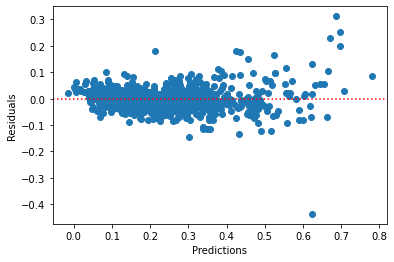

In [88]:
#data['res']=y_res
plt.scatter(y_pred, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


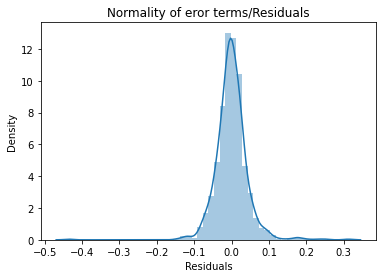

In [89]:
p=sns.distplot(y_res, kde=True)
p=plt.title("Normality of eror terms/Residuals")
plt.xlabel("Residuals")
plt.show()

# Lasso

In [90]:
from sklearn.linear_model import Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)
lm.intercept_, lm.coef_

(array([0.06266854]),
 array([-4.21142239e-02,  0.00000000e+00,  1.75197536e-01,  0.00000000e+00,
         0.00000000e+00,  1.94366989e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.93473325e-02,  1.55917447e-02,
         0.00000000e+00,  2.13270070e-02,  5.70843855e-03,  0.00000000e+00,
        -0.00000000e+00,  9.57645508e-02,  4.84818625e-02,  0.00000000e+00,
         6.43691795e-02,  0.00000000e+00,  1.38161065e-02,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -1.05145706e-02,  0.00000000e+00,
         3.43649339e-02,  0.00000000e+00, -7.09501901e-03,  0.00000000e+00,
         0.00000000e+00,  8.04515602e-03, -0.00000000e+00,  0.00000000e+00,
        -1.42777400e-02,  0.00000000e+00, -0.00000000e+00, -0.0000

In [91]:
lm.score(X_train, y_train)

0.8469051734259427

In [92]:
lm.score(X_test, y_test)

0.7883618585315085

In [104]:
a = [0.000001,0.00001,0.0001,0.0002,0.0005,0.001,0.01,0.1,0.2,0.4,0.6,0.8,1,10,100,1000]
for x in a:
    lm = Lasso(alpha = x)
    lm.fit(X_train, y_train)
    print('alpha = ',x)
    print("intercept, coef = ",lm.intercept_, lm.coef_)
    print("train_score = ",lm.score(X_train, y_train))
    print('test_score = ',lm.score(X_test, y_test))
    print('*************************************************************************************************')

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1278265249818089, tolerance: 0.0018105853053981492
  model = cd_fast.enet_coordinate_descent(


alpha =  1e-06
intercept, coef =  [-0.17498963] [-5.41715911e-02  1.80800482e-01  1.28716881e-01  5.58514821e-02
  2.92413024e-02  7.35836251e-03  3.74491458e-02 -4.57514887e-02
  3.67924438e-04 -1.11996098e-02 -3.55418487e-02  1.93986235e-01
  1.16004727e-01  6.01837633e-02  8.36894370e-02  2.43584644e-02
 -8.91105368e-04  6.32320050e-02  2.22202223e-02 -2.46619348e-02
 -6.81306419e-02  7.45673273e-02  1.95554057e-02 -8.89129485e-03
  7.15145027e-02 -2.47299088e-03  3.10758960e-02  7.10149780e-03
  2.76829550e-02  2.22876759e-02  4.42437310e-02 -9.94439465e-02
 -2.60944133e-02 -4.62439373e-03 -5.63557902e-03 -1.56706505e-04
  9.19675373e-03 -4.90975427e-02  8.27876431e-06  3.72024368e-02
  6.46367341e-02  2.59182654e-02  2.05445390e-02  1.81075418e-02
  2.06712065e-02  2.31239534e-02  7.66274174e-03  1.69758046e-02
  2.16485946e-03 -1.07014402e-02 -2.66462709e-02 -2.76255463e-02
 -2.41102212e-02 -2.33265645e-02 -1.79857674e-02  9.99810666e-04
  2.25438024e-02 -1.87010074e-03 -7.888728

alpha =  0.6
intercept, coef =  [0.2315761] [-0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.
  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0.  0.
  0.  0. -0.  0.  0.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0.
  0.  0. -0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0. -0.  0.  0.
 -0.  0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0.
 -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.  0. -0. -0. -0.
  0. -0.  0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.
 -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0. -0.  0. -0.]
train_score =  0.0
test_score =  -0.0004054291718063041
*************************************************************************************************
alpha =  0.8
intercept, coef =  [0.2315761] [-0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.
  0.  0. -0.  0.  0.  0.  0

### optimal value for alpha in Lasso is 0.0001
#### with  train_score =  0.8959912529595379 &
#### test_score =  0.8187101076056598

# Ridge

In [95]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=0.1, normalize=True)
rd.fit(X_train, y_train)
rd.intercept_, rd.coef_

(array([-0.06186358]),
 array([[-4.36472761e-02,  1.57078192e-01,  1.06562488e-01,
          4.93219188e-02,  1.74324909e-02,  1.09471623e-02,
          4.26010572e-02,  5.20752298e-03,  1.11876419e-02,
          5.64548524e-03,  2.72401464e-02,  8.49037409e-02,
          3.82751807e-02,  3.76811496e-02,  1.39556379e-01,
          2.07233919e-02, -2.39480697e-03,  5.40930638e-02,
          2.00266035e-02, -4.75943297e-03, -6.52405145e-02,
          7.01863049e-02,  2.73331730e-02, -2.74439689e-03,
          5.40766339e-02,  2.67024294e-02,  3.02743952e-02,
          6.48995657e-03,  2.33509270e-02,  1.68732434e-02,
          4.28228098e-02, -8.93003698e-02, -1.92601659e-02,
         -1.74606898e-03, -5.48820323e-03,  1.24456107e-03,
          1.21790583e-02, -4.81247598e-02, -7.18500955e-04,
          7.09392376e-03,  3.20982985e-02, -2.00951468e-03,
         -7.75656662e-03,  3.35573317e-03,  5.93669062e-03,
          1.15212333e-02, -2.22279047e-03,  4.50463893e-03,
         -8.58185

In [96]:
rd.score(X_train, y_train)

0.8976838353348052

In [97]:
rd.score(X_test, y_test)

0.806784100101703

In [102]:
a = [0.000001,0.00001,0.0001,0.001,0.01,0.02,0.1,0.2,0.4,0.6,0.8,1,10,100,1000]
for x in a:
    rd = Ridge(alpha = x, normalize=True)
    rd.fit(X_train, y_train)
    print('alpha = ',x)
    print("intercept, coef = ",rd.intercept_, rd.coef_)
    print("train_score = ",rd.score(X_train, y_train))
    print('test_score = ',rd.score(X_test, y_test))
    print('*************************************************************************************************')

alpha =  1e-06
intercept, coef =  [-0.10771202] [[-5.45246054e-02  1.81759679e-01  1.28614380e-01  5.57962156e-02
   3.04571611e-02  7.19062151e-03  3.78833451e-02 -3.56727008e-02
   2.87435511e-03 -7.03385396e-03 -5.65911256e-02  9.40967040e-02
   7.03395321e-02  4.60593963e-02  2.10728481e-01  2.43077809e-02
  -8.64814758e-04  6.31793482e-02  2.21897274e-02 -2.49205636e-02
  -6.78148604e-02  7.42280668e-02  1.93499944e-02 -9.23453441e-03
   7.16975496e-02 -2.92772121e-03  3.12938150e-02  7.66235319e-03
   2.81785839e-02  2.25843991e-02  4.44528087e-02 -1.00048946e-01
  -2.66157229e-02 -4.81294125e-03 -5.66486600e-03  2.87156874e-04
   9.52649663e-03 -4.84532114e-02  5.66003946e-04  3.77013176e-02
   6.51950652e-02  2.64453953e-02  2.09720649e-02  2.58381743e-02
   2.84216919e-02  3.08117331e-02  1.53002077e-02  2.46767487e-02
   9.87961866e-03 -2.49416538e-02 -4.08489618e-02 -4.17500340e-02
  -3.84825980e-02 -3.77193981e-02 -3.23075560e-02  8.29025238e-05
   2.17864841e-02 -2.7367912

### optimal value for alpha in Ridge is 0.01
#### with  train_score =  0.9007180947789868 &
#### test_score =  0.8070581947470751

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
80,Blmngtn,inf
110,2Story,inf
103,Timber,inf
104,Veenker,inf
105,1.5Fin,inf
...,...,...
34,YrSold,1.23
33,MoSold,1.21
32,MiscVal,1.14
114,AsphShn,NaN
